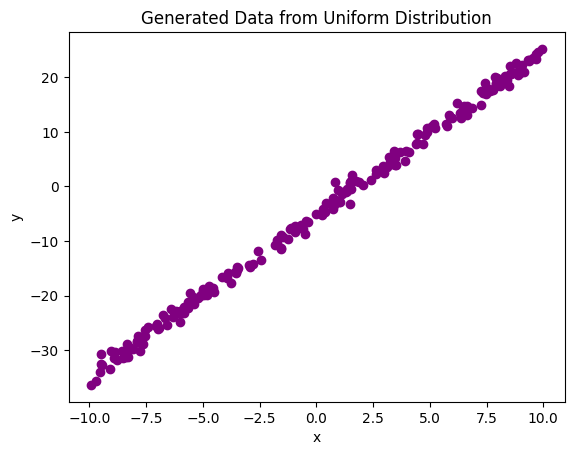

In [2]:
import numpy as np  # Importing NumPy for data generation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Step 1: Define parameters for the uniform distribution
low = -10  # Lower bound of the uniform distribution
high = 10  # Upper bound of the uniform distribution
n_points = 200  # Number of data points (increased to 200)

# Step 2: Generate random data for x using the uniform distribution
x = np.random.uniform(low, high, n_points)
# np.random.uniform generates random data points from a uniform distribution.
# Documentation: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

# Define constants for the linear relationship
a = 3  # Slope of the line (changed from 2)
b = -5  # Intercept of the line (changed from 1)

# Generate noise (ε) from a different distribution (Gaussian here for noise)
epsilon = np.random.normal(0, 1, n_points)  # Standard normal noise
# Noise adds randomness to the data to make the relationship less perfect.

# Step 3: Create the corresponding y values using the equation y = ax + b + ε
y = a * x + b + epsilon

# Step 4: Plot the generated data
plt.scatter(x, y, color='purple')  # Scatter plot of x and y values
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.title('Generated Data from Uniform Distribution')  # Title for the plot
plt.show()  # Display the plot

Learned slope (a): 2.976498007711326
Learned intercept (b): -5.04038431537018


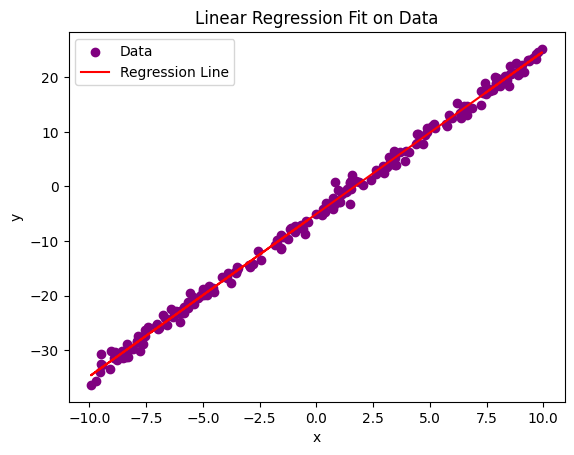

In [3]:
import pandas as pd  # Importing Pandas for data handling
from sklearn.linear_model import LinearRegression  # For fitting the linear regression model
import matplotlib.pyplot as plt  # For plotting

# Step 1: Prepare the data
# Convert x and y into a Pandas DataFrame (instead of reshaping with NumPy)
data = pd.DataFrame({'x': x, 'y': y})  # Creating a DataFrame for the data

# Step 2: Fit a linear regression model to the data
linear_model = LinearRegression()  # Initialize the linear regression model
# Fit the model on the 'x' and 'y' columns of the DataFrame
linear_model.fit(data[['x']], data['y'])

# Step 3: Get the predicted y values using the fitted model
y_pred = linear_model.predict(data[['x']])  # Predict y based on the model

# Step 4: Report the learned parameters a (slope) and b (intercept)
slope = linear_model.coef_[0]  # Slope of the fitted line
intercept = linear_model.intercept_  # Intercept of the fitted line
print(f"Learned slope (a): {slope}")
print(f"Learned intercept (b): {intercept}")

# Step 5: Plot the original data points and the regression line
plt.scatter(data['x'], data['y'], color='purple', label='Data')  # Scatter plot of the original data
plt.plot(data['x'], y_pred, color='red', label='Regression Line')  # Line of best fit
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit on Data')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


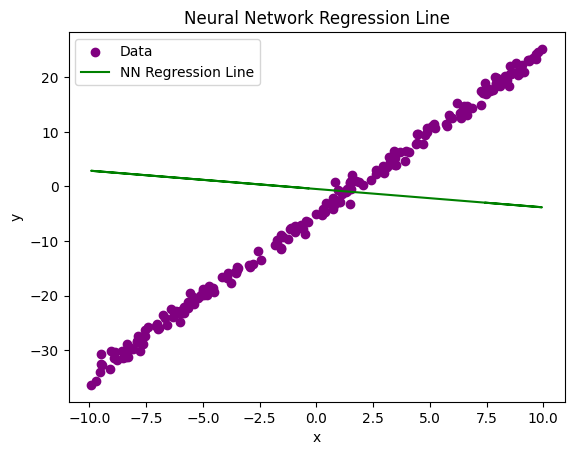

In [4]:
import tensorflow as tf  # Importing TensorFlow for building the neural network
from tensorflow.keras.models import Sequential  # For creating a sequential neural network model
from tensorflow.keras.layers import Dense  # Dense layer for neural networks
import matplotlib.pyplot as plt  # For plotting

# Step 1: Build a neural network with one dense layer
model = Sequential()  # Sequential model to stack layers sequentially
# Add a Dense layer with 1 output (no activation, meaning it's linear)
model.add(Dense(1, input_dim=1, activation='linear'))
# Dense(1) creates a fully connected layer with 1 unit (output), input_dim=1 means it takes one feature as input
# Activation function 'linear' performs no transformation, it's just a linear operation y = Wx + b
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

# Step 2: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# 'adam' optimizer is used to adjust weights during training, 'mean_squared_error' is the loss function for regression tasks
# Documentation for compile: https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

# Step 3: Train the model
model.fit(x, y, epochs=100, verbose=0)
# Trains the model for 100 epochs, 'verbose=0' silences the training output
# Documentation for fit: https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

# Step 4: Predict y values using the trained model
y_nn_pred = model.predict(x)
# Predicts the output for the given input data 'x'
# Documentation for predict: https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

# Step 5: Plot the original data and the neural network regression line
plt.scatter(x, y, color='purple', label='Data')  # Scatter plot of the original data
plt.plot(x, y_nn_pred, color='green', label='NN Regression Line')  # Plot the NN regression line
plt.xlabel('x')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.title('Neural Network Regression Line')
plt.legend()  # Show the legend
plt.show()  # Display the plot

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE (1 Layer): 0.25641659400750955
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MSE (2 Layers): 0.20765839823597468


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
MSE (3 Layers): 0.20405357193821108


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MSE (4 Layers): 0.20333375413157803


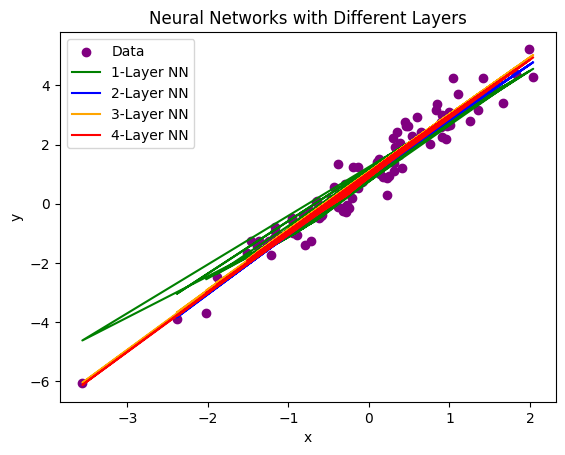

1 Layer MSE: 0.25641659400750955
2 Layers MSE: 0.20765839823597468
3 Layers MSE: 0.20405357193821108
4 Layers MSE: 0.20333375413157803


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  # For MSE calculation

# Function to build, compile, train, and predict using a neural network model
def build_and_train_nn(layers, x, y):
    model = Sequential()  # Initialize the model
    # Input layer
    model.add(Dense(64, input_dim=1, activation='relu'))  # First hidden layer with ReLU activation
    # Add hidden layers based on the input 'layers' parameter
    for _ in range(layers - 1):
        model.add(Dense(64, activation='relu'))  # Hidden layers with ReLU activation

    # Output layer (linear transformation)
    model.add(Dense(1, activation='linear'))  # Output layer for regression

    # Compile the model with Adam optimizer and MSE loss
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the data
    model.fit(x, y, epochs=100, verbose=0)

    # Predict the output using the trained model
    y_pred = model.predict(x)

    # Return the predictions and the trained model
    return y_pred, model

# List to store the MSEs for each model
mse_values = {}

# Step 1: Neural network with 1 layer (single dense layer)
y_pred_1_layer, model_1_layer = build_and_train_nn(1, x, y)
mse_1_layer = mean_squared_error(y, y_pred_1_layer)
mse_values['1 Layer'] = mse_1_layer
print(f"MSE (1 Layer): {mse_1_layer}")

# Step 2: Neural network with 2 layers
y_pred_2_layers, model_2_layers = build_and_train_nn(2, x, y)
mse_2_layers = mean_squared_error(y, y_pred_2_layers)
mse_values['2 Layers'] = mse_2_layers
print(f"MSE (2 Layers): {mse_2_layers}")

# Step 3: Neural network with 3 layers
y_pred_3_layers, model_3_layers = build_and_train_nn(3, x, y)
mse_3_layers = mean_squared_error(y, y_pred_3_layers)
mse_values['3 Layers'] = mse_3_layers
print(f"MSE (3 Layers): {mse_3_layers}")

# Step 4: Neural network with 4 layers
y_pred_4_layers, model_4_layers = build_and_train_nn(4, x, y)
mse_4_layers = mean_squared_error(y, y_pred_4_layers)
mse_values['4 Layers'] = mse_4_layers
print(f"MSE (4 Layers): {mse_4_layers}")

# Plot the data and predictions from each model
plt.scatter(x, y, color='purple', label='Data')  # Original data
plt.plot(x, y_pred_1_layer, color='green', label='1-Layer NN')
plt.plot(x, y_pred_2_layers, color='blue', label='2-Layer NN')
plt.plot(x, y_pred_3_layers, color='orange', label='3-Layer NN')
plt.plot(x, y_pred_4_layers, color='red', label='4-Layer NN')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Networks with Different Layers')
plt.legend()
plt.show()

# Print MSE values
for layers, mse in mse_values.items():
    print(f"{layers} MSE: {mse}")

MSE (Linear Regression): 8.710408655719162
MSE (Single Dense Layer NN): 6.2653535513934004
MSE (2-Layer NN): 8.831504236144351
MSE (3-Layer NN): 8.654528861437202
MSE (4-Layer NN): 8.841040437127903


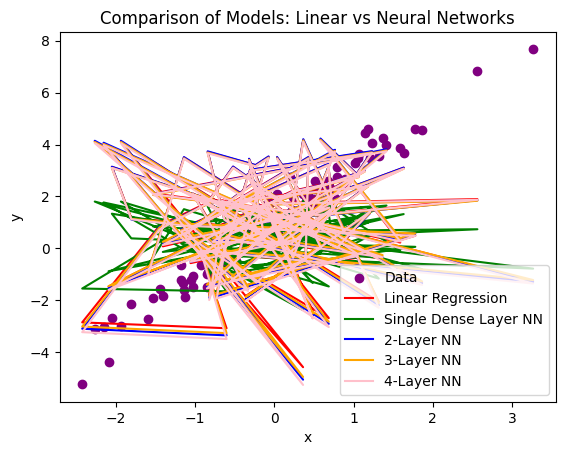

In [20]:
import matplotlib.pyplot as plt  # For plotting data and model results
from sklearn.metrics import mean_squared_error  # For calculating MSE

# Step 1: Calculate MSE for each model
mse_linear = mean_squared_error(y, y_pred)  # MSE for Linear Regression
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MSE calculates the average squared difference between actual values (y) and predicted values (y_pred).
# It measures how close the predictions are to the true values. A lower MSE indicates a better fit.

mse_nn_single = mean_squared_error(y, y_nn_pred)  # MSE for Single Dense Layer NN
mse_nn_2_layers = mean_squared_error(y, y_pred_2_layers)  # MSE for 2-Layer NN
mse_nn_3_layers = mean_squared_error(y, y_pred_3_layers)  # MSE for 3-Layer NN
mse_nn_4_layers = mean_squared_error(y, y_pred_4_layers)  # MSE for 4-Layer NN

# Step 2: Print MSE values for each model
print(f'MSE (Linear Regression): {mse_linear}')
print(f'MSE (Single Dense Layer NN): {mse_nn_single}')
print(f'MSE (2-Layer NN): {mse_nn_2_layers}')
print(f'MSE (3-Layer NN): {mse_nn_3_layers}')
print(f'MSE (4-Layer NN): {mse_nn_4_layers}')

# Step 3: Plot all models on the same graph for comparison
plt.scatter(x, y, color='purple', label='Data')  # Scatter plot of the original data
# Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
# Scatter plot shows the actual data points (x, y), providing a visual reference for the models' fit.

plt.plot(x, y_pred, color='red', label='Linear Regression')  # Linear Regression model
# Plotting the linear regression line, which represents the best-fit line found by the model.

plt.plot(x, y_nn_pred, color='green', label='Single Dense Layer NN')  # Single Layer NN model
# The green line represents the predictions made by the neural network with a single dense layer.

plt.plot(x, y_pred_2_layers, color='blue', label='2-Layer NN')  # 2-Layer NN model
plt.plot(x, y_pred_3_layers, color='orange', label='3-Layer NN')  # 3-Layer NN model
plt.plot(x, y_pred_4_layers, color='pink', label='4-Layer NN')  # 4-Layer NN model

# Adding labels and title to the plot
plt.xlabel('x')  # Label for x-axis
plt.ylabel('y')  # Label for y-axis
plt.title('Comparison of Models: Linear vs Neural Networks')  # Title for the plot
plt.legend()  # Displaying the legend to distinguish between different models
plt.show()  # Show the plot